In [1]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torch import nn
import torch.nn.functional as f
import wandb

wandb.init(project='simple_auto', entity='zirui23')


class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        #encoder
        self.conv1 = nn.Conv2d(1, 3, 3)
        self.pooling = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(3, 16, 2)
        self.pooling = nn.MaxPool2d(2,2)
        #decoder
        self.t_conv1 = nn.ConvTranspose2d(16, 3, 4, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(3, 1, 2, stride=2)
    

    def forward(self, x):
            x = torch.relu(self.conv1(x))
            x = self.pooling(x)
            x = torch.relu(self.conv2(x))
            x = self.pooling(x)
            latent1 = x
            x = torch.relu(self.t_conv1(x))
            x = torch.sigmoid(self.t_conv2(x))
            
            return x, latent1


wandb: Currently logged in as: zirui23. Use `wandb login --relogin` to force relogin


In [2]:
batch_size = 32
learning_rate = 2e-3
num_epochs = 10


data_train = MNIST('~/mnist_data', train=True, download=True,
                   transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])]))
data_loader = DataLoader(data_train, batch_size=batch_size, shuffle = False)

model = ConvAutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(
    model.parameters(), lr=learning_rate)

import matplotlib.pyplot as plt

for epoch in range(num_epochs): 
    for data in data_loader:
        #print(data[0].size())
        img, labels = data
        #print(img.size())
        #img = img.view(img.size(0),-1)
        #print(img.size())
        
        output,latent1 = model(img)
        
        #print(latent1.size())
        
        #print(output.size())
        loss = criterion(output,img)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        wandb.log({'epoch': num_epochs, 'loss': loss})
        
            
    
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.data.item()}')


/Users/zarius/miniconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


epoch [1/10], loss:0.9219143390655518
epoch [2/10], loss:0.9219030141830444
epoch [3/10], loss:0.9219008684158325
epoch [4/10], loss:0.92190021276474
epoch [5/10], loss:0.9218999147415161
epoch [6/10], loss:0.9218998551368713
epoch [7/10], loss:0.9218997359275818
epoch [8/10], loss:0.8697859048843384
epoch [9/10], loss:0.8677096962928772
epoch [10/10], loss:0.8663533329963684


torch.Size([32, 1, 28, 28])
torch.Size([28, 28])


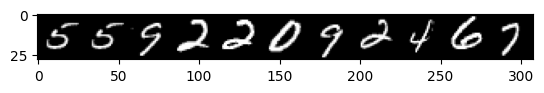

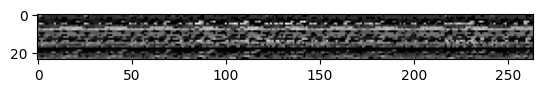

torch.Size([1, 28, 28])


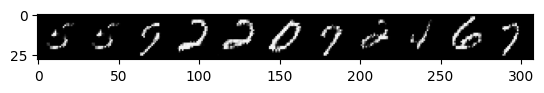

In [3]:
import numpy as np
#print(latent.size())
print(img.size())


img = img.view(32,28,28)
print(img[0].size())
display = np.array(img[0].detach(),dtype='float')
pixels = display.reshape((28, 28))

for i in range(10):
    #print(i)
    display_1 = np.array(img[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((28, 28))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    
plt.imshow(pixels, cmap='gray')
plt.show()


latent1 = latent1.view(32,24,24)
#print(output[0].size())
display = np.array(latent1[0].detach(),dtype='float')
pixels = display.reshape((24, 24))

for i in range(10):
    #print(i)
    display_1 = np.array(latent1[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((24, 24))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    
plt.imshow(pixels, cmap='gray')
plt.show()




output = output.view(32,1, 28,28)
print(output[0].size())
display = np.array(output[0].detach(),dtype='float')
pixels = display.reshape((28, 28))

for i in range(10):
    #print(i)
    display_1 = np.array(output[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((28, 28))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    
plt.imshow(pixels, cmap='gray')
plt.show()
